
Model Accuracy: 0.8728

Model R2: 0.3260

Model RMS: 0.7193

Classification Report:
              precision    recall  f1-score   support

         acc       0.76      0.73      0.74        77
        good       0.00      0.00      0.00        14
       unacc       0.94      0.96      0.95       242
       vgood       0.54      1.00      0.70        13

    accuracy                           0.87       346
   macro avg       0.56      0.67      0.60       346
weighted avg       0.85      0.87      0.86       346


Confusion Matrix:
[[ 56   0  15   6]
 [  9   0   0   5]
 [  9   0 233   0]
 [  0   0   0  13]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


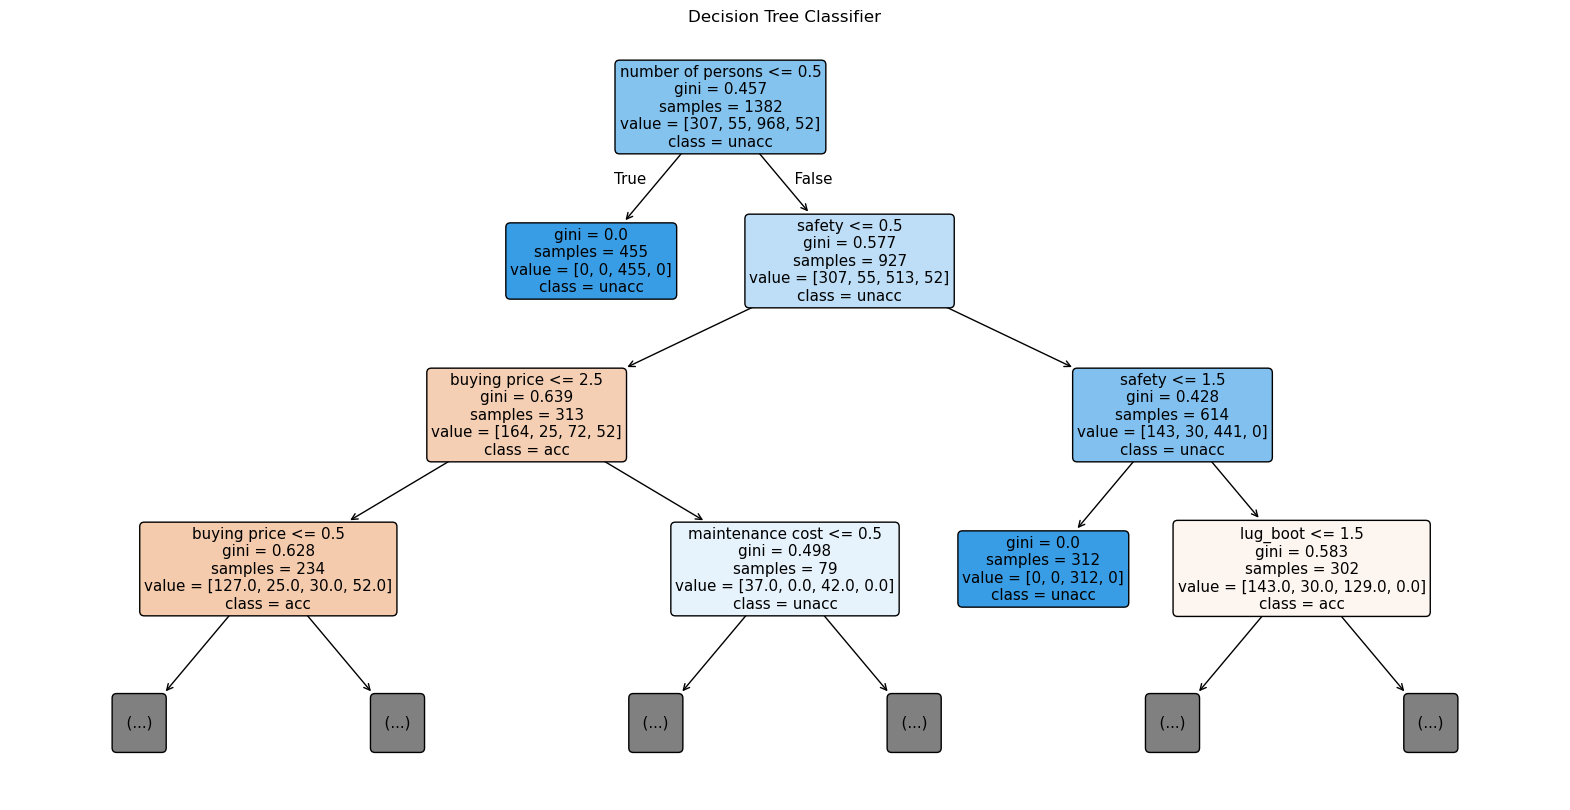


Feature Importance:
             feature  importance
5             safety    0.397942
3  number of persons    0.240951
1   maintenance cost    0.196196
0       buying price    0.109280
4           lug_boot    0.055632
2    number of doors    0.000000


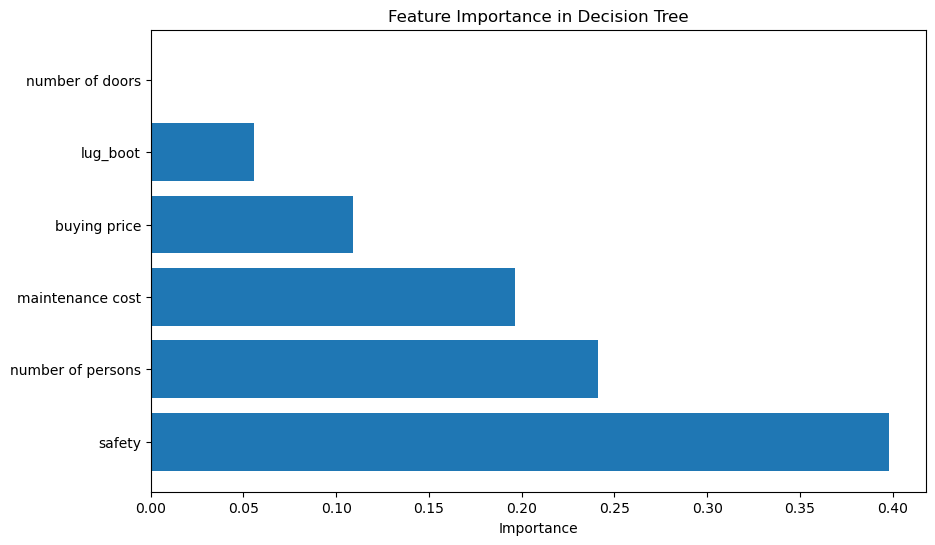

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv('car_evaluation.csv')
"""
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget distribution:")
print(df['decision'].value_counts())
"""
# Separate features and target
X = df.drop('decision', axis=1)  # Features
y = df['decision']  # Target

# Encode categorical features to numerical values
label_encoders = {}
X_encoded = X.copy()

for column in X.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"\nModel R2: {r2:.4f}")
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nModel RMS: {rms:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the decision tree (first few levels)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=X.columns,
          class_names=le_target.classes_,
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for readability
plt.title("Decision Tree Classifier")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()